# Step 1: Import of your data

## 1.1 Import your data from excel

In order to fit a michaelis menten model to your data, we first need to import your data from an excel file. The **pandas** package is able to read and extract data from microsoft excel spreadsheet using the command:

```python

df = pd.read_excel(r"path")

```

Now we have all the data imported. In the next step, we want to see, what the contents of the excel files are. Therefore, we visualise the head, which are the first five lines of the spreadsheet

## 1.2 Visualise the content of the excel file

```python
df.head()

```

## 1.3 Select the data from your spreadsheet

Now we want to select the columns of the spreadsheet, to which the model is intended to be fitted. For this purpose, we extract the concentration values and the measured reaction velocities:

```python

concentrations = df["concentration"]
data = df["v"]

```


In [2]:
# https://www.anotherscienceblog.com/post/the-michaelis-menten-enzyme-kinetics-model
from scipy import stats
import numpy as np
import pandas as pd

df = pd.read_excel(r"Gruppe A.xlsx")


concentrations = []

concentrations = df["concentration"]
data = df["v"]

print(data)

df.head()


0      0.0000
1      1.4460
2      2.6470
3      4.6720
4      7.7730
5     11.4320
6     18.7920
7     23.9130
8     26.5505
9     29.3115
10    32.1015
11    31.4345
12    37.1620
Name: v, dtype: float64


,concentration,v,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0.00,0.000,NaN,NaN,km,0.3
1,0.05,1.446,NaN,NaN,vmax,2.0
2,0.10,2.647,NaN,NaN,NaN,NaN
3,0.20,4.672,NaN,NaN,NaN,NaN
4,0.30,7.773,NaN,NaN,NaN,NaN


Text(0, 0.5, 'reaction velocity in $mmol*L^{-1}*s^{-1}$')

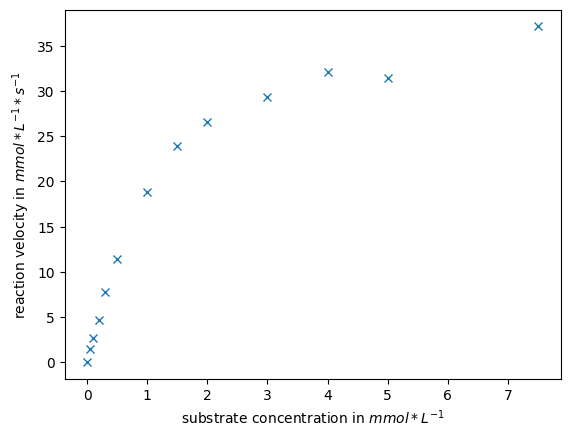

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(concentrations, data, linestyle="", marker="x")
ax.set_xlabel("substrate concentration in $mmol*L^{-1}$")
ax.set_ylabel("reaction velocity in $mmol*L^{-1}*s^{-1}$")


In [4]:
import lmfit

def mm(s, km, vmax):
    v = vmax*s/(km+s)
    return v

reaction_velocity = np.array(data)
print(reaction_velocity)
concentrations = np.array(concentrations)


mdl = lmfit.Model(mm)

params = lmfit.Parameters()
params.add('km', 2, min=0.000001, max=3)
params.add('vmax', 2, min=0.0000000001, max=100)

solution = mdl.fit(data,params=params,s=concentrations)

print(solution.fit_report())
print(solution.best_fit)

fitted_data = solution.best_fit


[ 0.      1.446   2.647   4.672   7.773  11.432  18.792  23.913  26.5505
 29.3115 32.1015 31.4345 37.162 ]
[[Model]]
    Model(mm)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 13
    # variables        = 2
    chi-square         = 9.55472175
    reduced chi-square = 0.86861107
    Akaike info crit   = -0.00288072
    Bayesian info crit = 1.12701799
    R-squared          = 0.99553260
[[Variables]]
    km:    1.27410301 +/- 0.09912314 (7.78%) (init = 2)
    vmax:  42.1546799 +/- 1.09422687 (2.60%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(km, vmax) = 0.888
[ 0.          1.59182026  3.0677962   5.71936692  8.03403837 11.88056152
 18.53683836 22.79368128 25.75036874 29.58843982 31.97107058 33.59418854
 36.03332429]


Text(0, 0.5, 'reaction velocity in $mmol*L^{-1}*s^{-1}$')

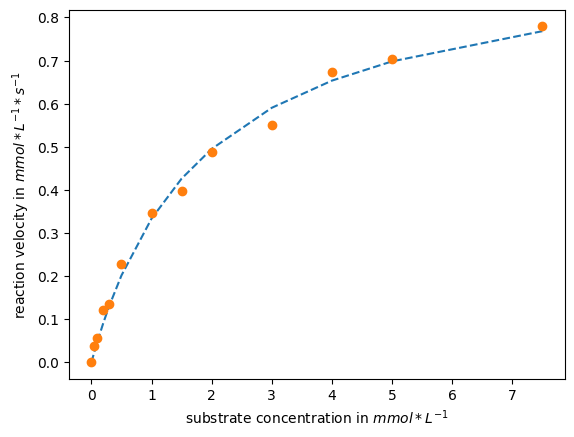

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(concentrations, fitted_data, linestyle="--")
ax.plot(concentrations, data, linestyle="", marker="o")
ax.set_xlabel("substrate concentration in $mmol*L^{-1}$")
ax.set_ylabel("reaction velocity in $mmol*L^{-1}*s^{-1}$")

plt.savefig("Michaelis menten model.svg", format="svg")